## Summary 

The goal of this project is to explore the relationship between accident severity and traffic impact, 
and to evaluate whether the original `Severity` label (1–4) accurately reflects real-world traffic disruption - including accident duration, distance affected, and other related factors.

## Motivation

The inspiration for creating this project was to conduct an analysis of the sampled version of the US Accidents dataset, to explore features, and assess the reliability of `Severity` for future machine learning applications/models.

## Tools used

**NumPy** – for numerical operations

**Pandas** – for data manipulation and analysis

**Matplotlib** and **Seaborn** – for visualizations

**Plotly** – for interactive charts and maps

## Data Overview

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('US_Accidents_March23_sampled_500k.csv') # Creating a df variable

In [3]:
df.head() # Taking a brief look

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night


In [4]:
df.info() # Checking for NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,279623.000000,279623.000000,500000.000000,489534.000000,370983.000000,488870.000000,491072.000000,488709.000000,463013.000000,357384.000000
mean,2.212748,36.206421,-94.736583,36.273192,-95.776553,0.564317,61.646254,58.229028,64.834921,29.536621,9.091540,7.681347,0.008289
std,0.486661,5.071411,17.405761,5.265333,18.120211,1.774872,19.000133,22.352246,22.826158,1.008666,2.708083,5.431361,0.101865
min,1.000000,24.562117,-124.497420,24.570110,-124.497419,0.000000,-77.800000,-53.200000,1.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.416823,-117.233047,33.474773,-117.778324,0.000000,49.000000,43.000000,48.000000,29.370000,10.000000,4.600000,0.000000
50%,2.000000,35.832147,-87.794365,36.192669,-88.039013,0.029000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.082443,-80.359601,40.181341,-80.252449,0.465000,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.999569,-67.484130,48.998901,-67.484130,193.479996,207.000000,207.000000,100.000000,38.440000,130.000000,822.800000,10.130000


## Exploratory Data Analysis

### Spread of Severity level

<Axes: xlabel='Severity'>

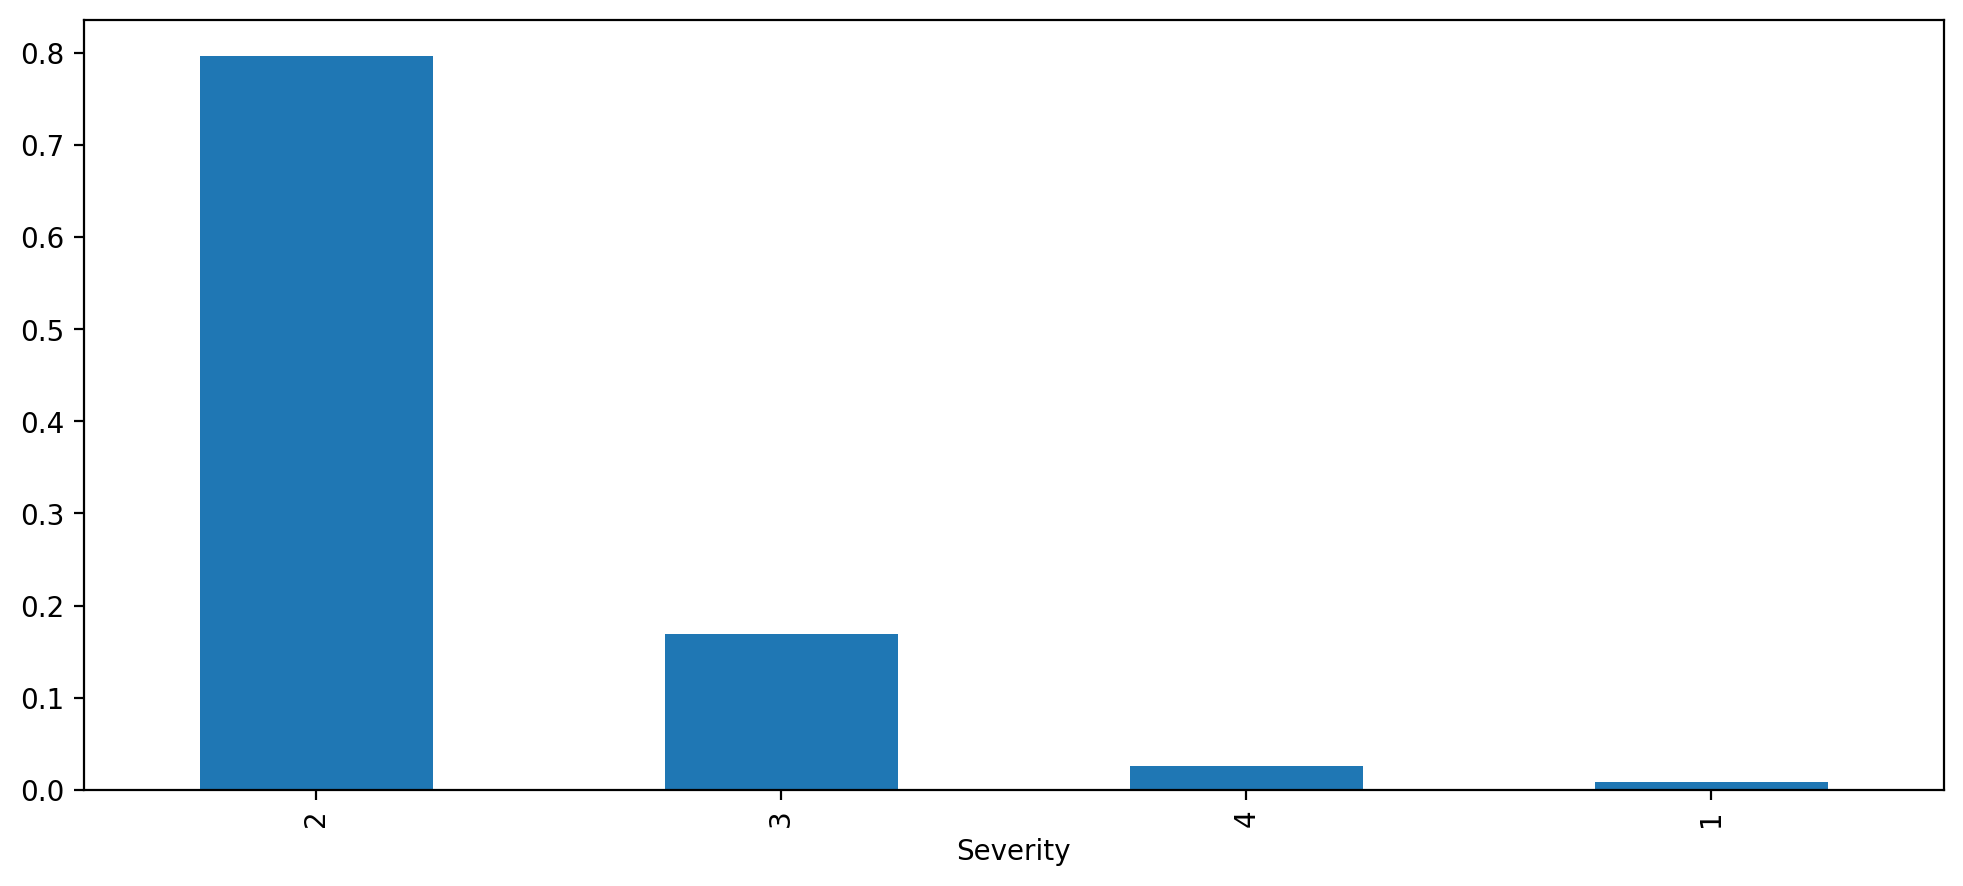

In [6]:
plt.figure(dpi=200, figsize=(12, 5))  # Making plot bigger and making better quality
df['Severity'].value_counts(normalize=True).plot(kind='bar')   # Normalizing y-values to get %

The levels are quite imbalanced, which leads to problems with fitting ML model.

### Duration and Distance for each Severity level

In [7]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'].apply(lambda x: x.split('.')[0])) # Converting str -> datetime to calculate duration
df['End_Time'] = pd.to_datetime(df['End_Time'].apply(lambda x: x.split('.')[0]))     # Also splitting in 2 parts to get rid of microseconds

df['Duration'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60         # Converting seconds -> minutes

<Axes: xlabel='Severity', ylabel='Distance(mi)'>

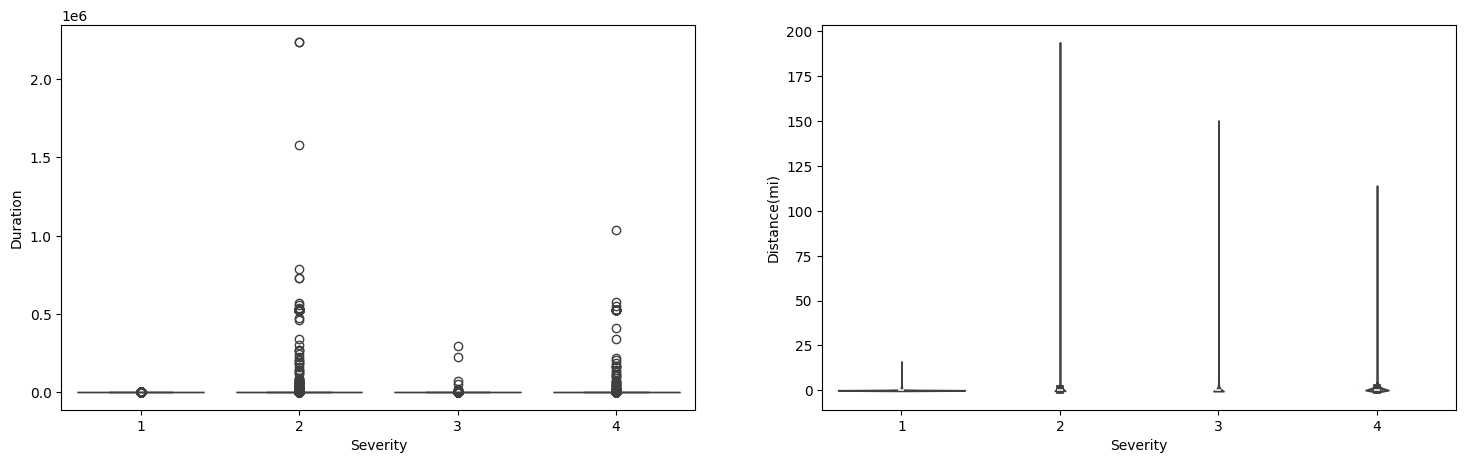

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))                      # Creating subplots to show everything in 1 output

sns.boxplot(ax=axes[0], data=df, x='Severity', y='Duration')         # Creating boxplot to see both outliers and quartiles
sns.violinplot(ax=axes[1], data=df, x='Severity', y='Distance(mi)')  # Creating violinplot to see range for distance and density of values

The dataset contains anomalies caused by accidents whose `Duration` exceeded two years.. `Distance` is leaving its normal borders. Traffic over 125 mile in the second level of severity should be moved to another one.
Now, we need to:
- Delete outliers for `Duration`, but not for `Distance`. These 2 are correlating values.
- If deleting outliers won't change the `Distance` ones, then we can make a hypothesis of **bad correlations**.
- And finally, for these features, we will create heatmap based on correlations to prove the hypothesis.

In [9]:
df[df['Duration'] >= 1000000]  # Getting indexes for abnormal outliers

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration
135779,A-5292352,Source1,2,2018-04-19 09:24:00,2022-07-20 09:34:38,40.893725,-72.474764,40.895582,-72.460423,0.760,...,False,False,False,False,False,Day,Day,Day,Day,2.236331e+06
255414,A-5399002,Source1,2,2018-04-19 09:24:00,2022-07-20 10:49:45,40.894453,-72.470099,40.895494,-72.457948,0.639,...,False,False,False,False,False,Day,Day,Day,Day,2.236406e+06
296334,A-7277768,Source1,2,2020-02-27 11:06:26,2023-02-27 12:06:00,39.536600,-119.804580,39.536560,-119.802830,0.093,...,False,False,False,False,False,Day,Day,Day,Day,1.578300e+06
468331,A-3520162,Source1,4,2016-05-05 14:47:55,2018-04-27 16:00:00,40.731646,-74.130361,40.739081,-74.068156,3.297,...,False,False,False,False,False,Day,Day,Day,Day,1.039752e+06


In [10]:
# Getting description of outliers
print(df['Description'].values[135779])
print(df['Description'].values[255414])
print(df['Description'].values[296334])
print(df['Description'].values[468331])

NYSDOT - Region 10: Crash on NY 27 eastbound area of Exit 66 - North Shore Highway; CR 39; North Shore Road (Suffolk) left lane closed
NYSDOT - Region 10: Crash on NY 27 eastbound area of Exit 66 - North Shore Highway; CR 39; North Shore Road (Suffolk) left lane closed
At Wells Ave/Exit 14 - Accident.
Closed between Roanoke Ave and US-1-9-TRUCK/Tonnele Ave - Road closed due to accident. Roadwork.


The idea of this print was to understand whether the `Description` was hand-made or generated. And for the reason that the `Description` was made automatically, there must've been some problems with automatization of time stamp. We can clearly see 1 example of duplicate.

In [11]:
len(df[df['Duration'] >= 1440])  # Looking for approximate amount of potential outliears (1440 minutes is 24 hours)

2206

In [12]:
df = df.drop(df[df['Duration'] >= 1440].index)  # Getting rid of outliers

### Looking at plots after cleaning outliers

<Axes: xlabel='Severity', ylabel='Distance(mi)'>

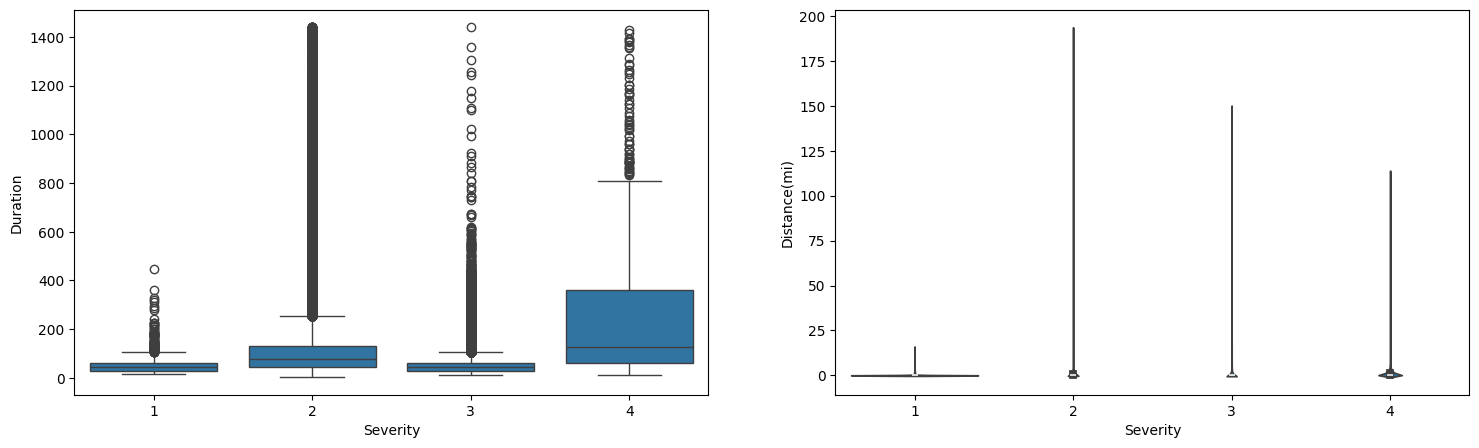

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))                      # Creating subplots to show everything in 1 output

sns.boxplot(ax=axes[0], data=df, x='Severity', y='Duration')         # Creating boxplot to see both outliers and quartiles
sns.violinplot(ax=axes[1], data=df, x='Severity', y='Distance(mi)')  # Creating violinplot to see range for distance and density of values

<Axes: xlabel='Severity', ylabel='Log_Duration'>

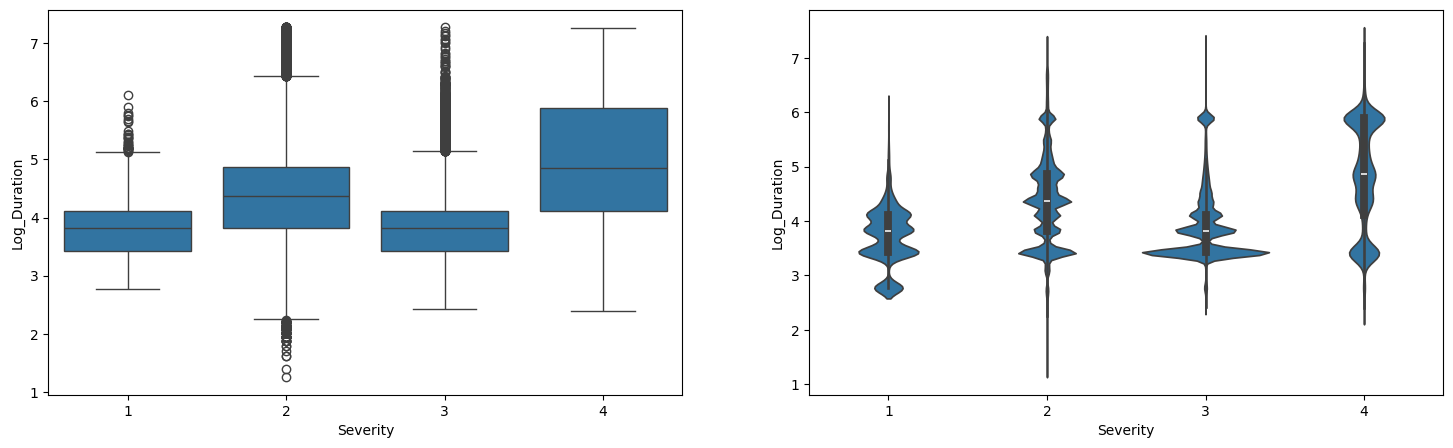

In [14]:
df['Log_Duration'] = np.log1p(df['Duration'])  # Creating log values to see apparent version of data

fig, axes = plt.subplots(1, 2, figsize=(18, 5))  # Creating plots, but with log values
sns.boxplot(ax=axes[0], data=df, x='Severity', y='Log_Duration')
sns.violinplot(ax=axes[1], data=df, x='Severity', y='Log_Duration')

Outliers in the `Distance` variable remained unchanged after initial cleaning.

Even after removing major outliers, the distribution of `Severity` levels remains inconsistent and unclear.

"**`Severity`** - Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay)." That's the row from author's feature description.

Despite the fact that time data is broken, levels are almost the same, which gives 2 options:
1) `Severity` feature has wrong metric division and levels should be re-elected.
2) `Severity` feature illustrates something else, but totally not the impact on traffic

### Correlations

<Axes: >

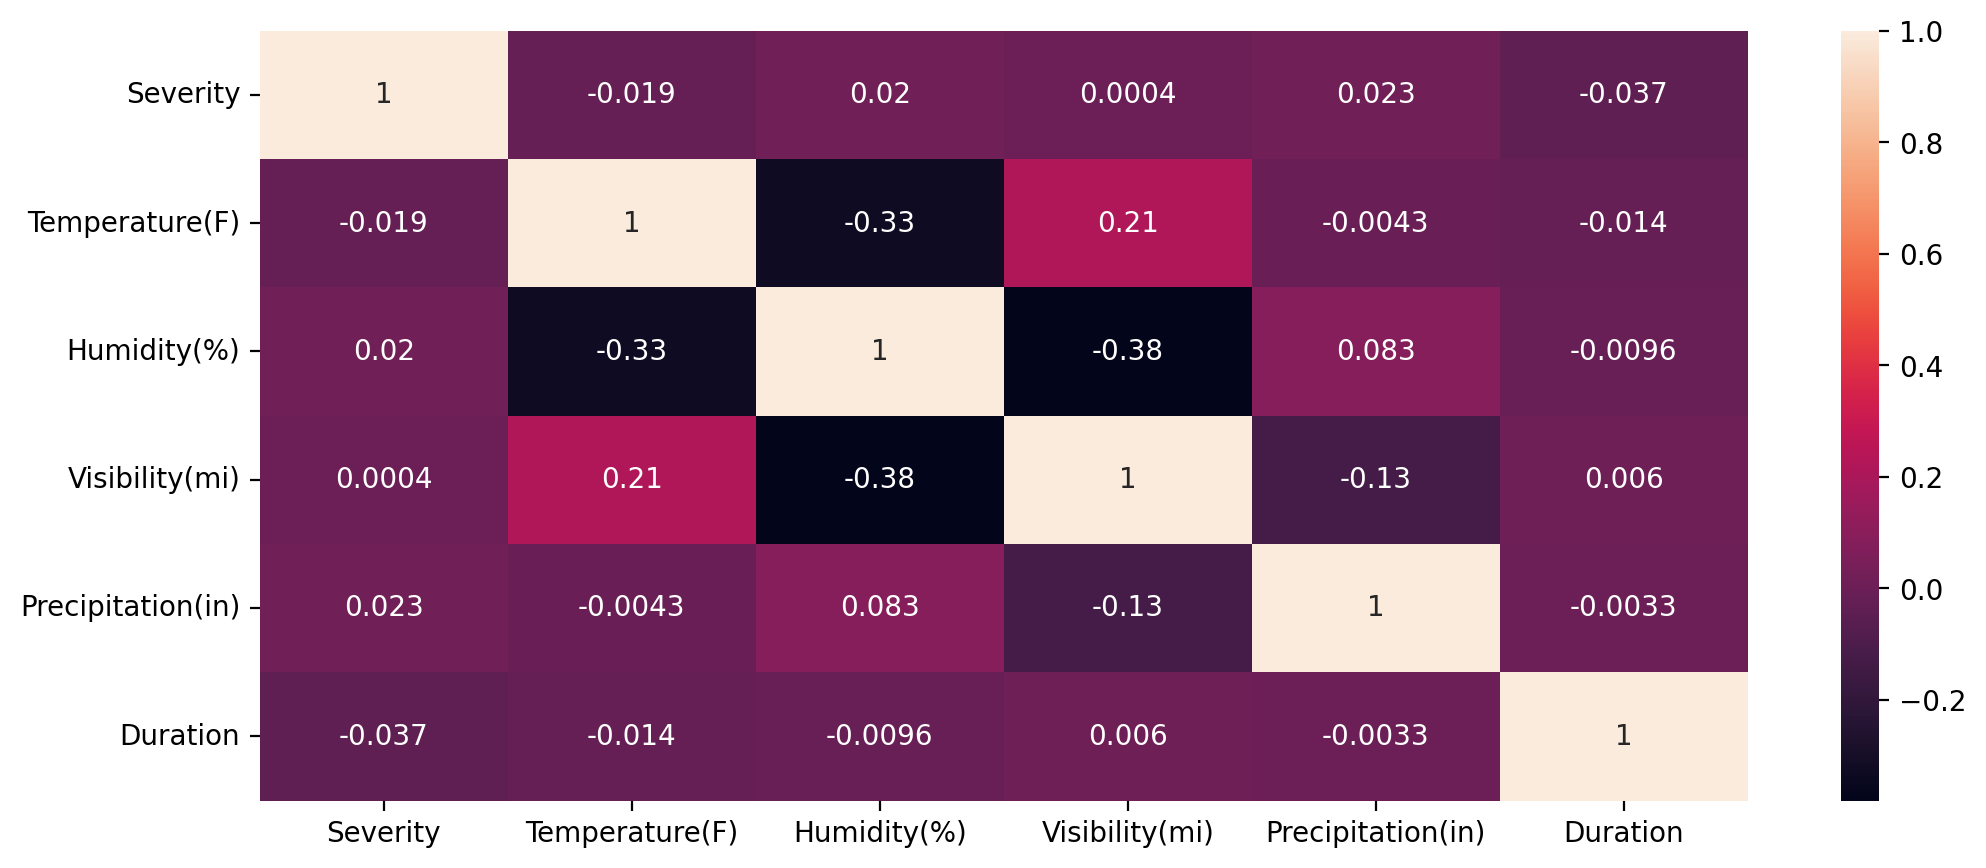

In [15]:
plt.figure(dpi=200, figsize=(12, 5))
sns.heatmap(df[['Severity', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Precipitation(in)', 'Duration']].corr(numeric_only=True), annot=True)

After analysing the correlation between `Duration` and `Severity` (-0.037) we can easily make a conclusion, that `Severity` itself is divided **wrong**.
We now turn our attention to other features that may negatively affect the model's accuracy.

### Finding the state with the most accidents

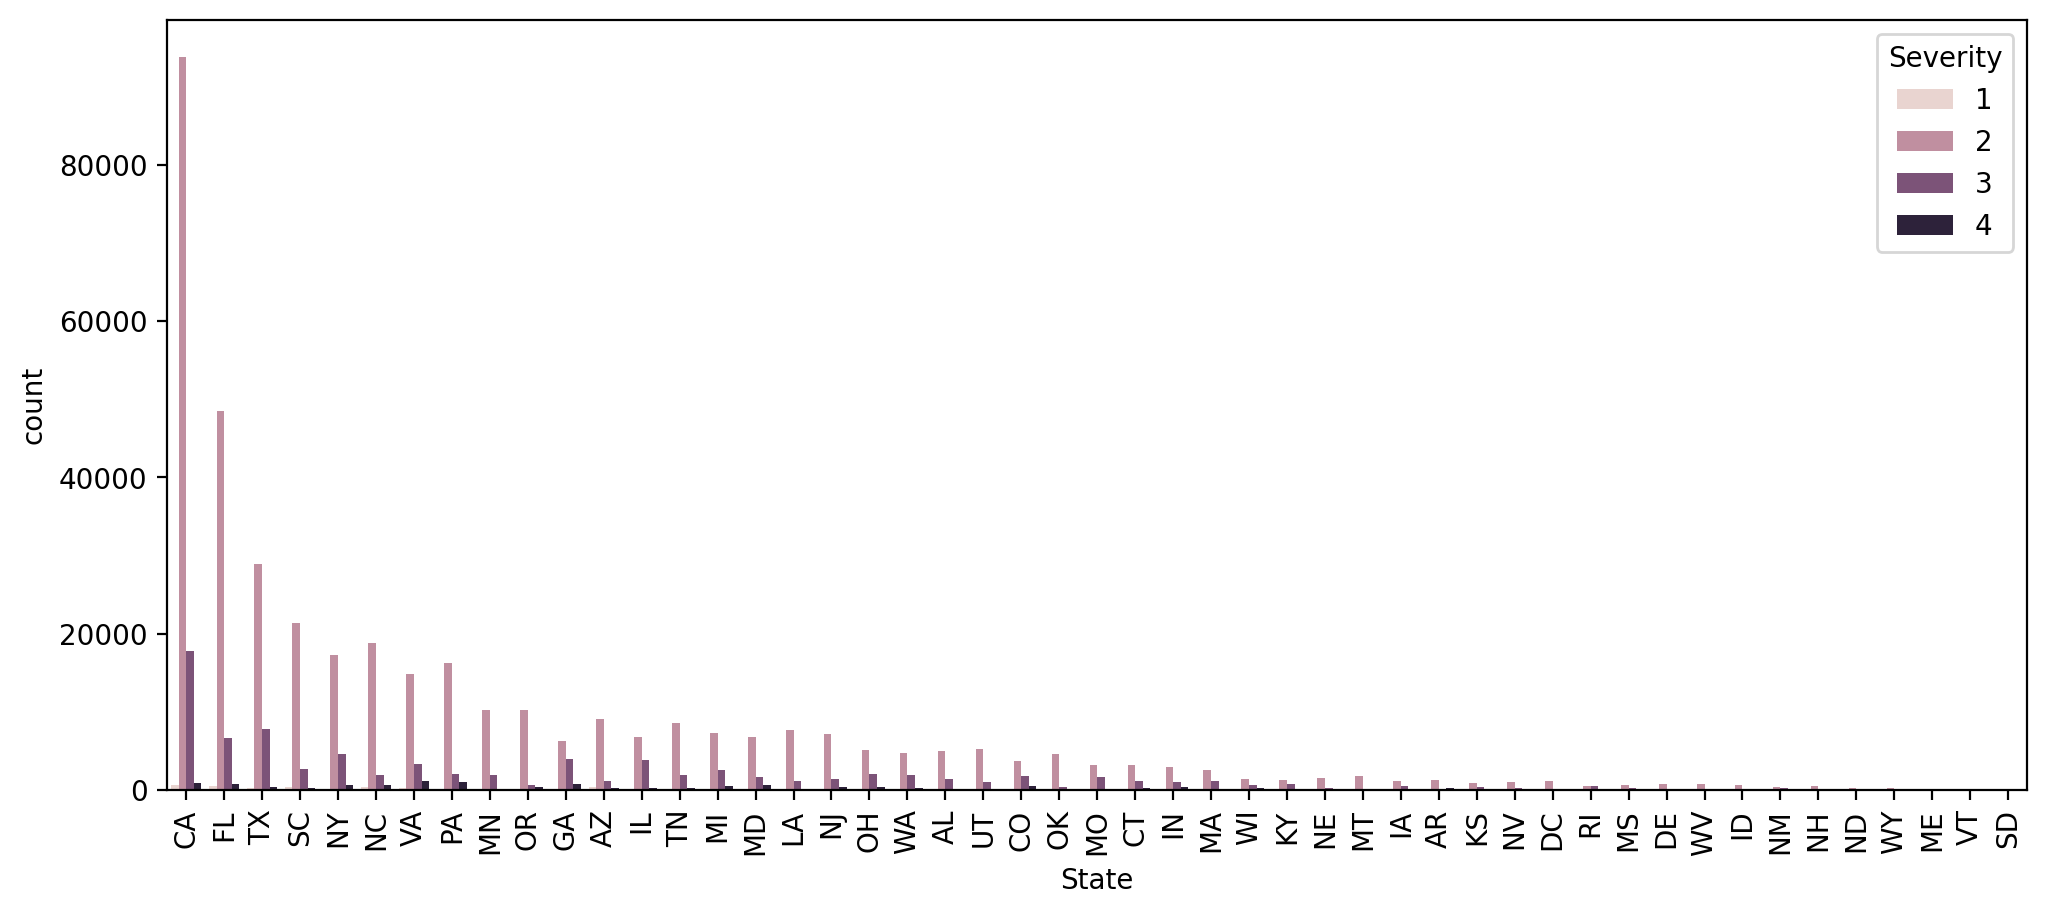

In [16]:
# I am checking remaining columns to find more problems and also, to complete my EDA.

state_order = df['State'].value_counts().index   # Making order for plot, so data looks better

plt.figure(dpi=200, figsize=(12, 5))  # Making plot bigger and making better quality
sns.countplot(df, x='State', order=state_order, hue='Severity')  # Creating countplot
plt.xticks(rotation=90);  # Rotating ticks to make them readable

#### The same statistics, drawn on a map

In [17]:
import plotly.express as px  # Map drawer

# Making new df
state_counts = df['State'].value_counts(normalize=True).reset_index()  
state_counts.columns = ['State', 'Accident(%)']  

# Building map
fig = px.choropleth(  
    state_counts,
    locations='State',
    locationmode='USA-states',
    color='Accident(%)',
    scope='usa',
    color_continuous_scale='Reds',
    title='Accident Percentages'
)

fig.write_html("accidents_map.html")
fig.show()

The accident distribution of States looks normal. No need for working with outliers here.

### Traffic during the Twilight and Sunset/Sunrise.

<Axes: xlabel='Sunrise_Sunset', ylabel='count'>

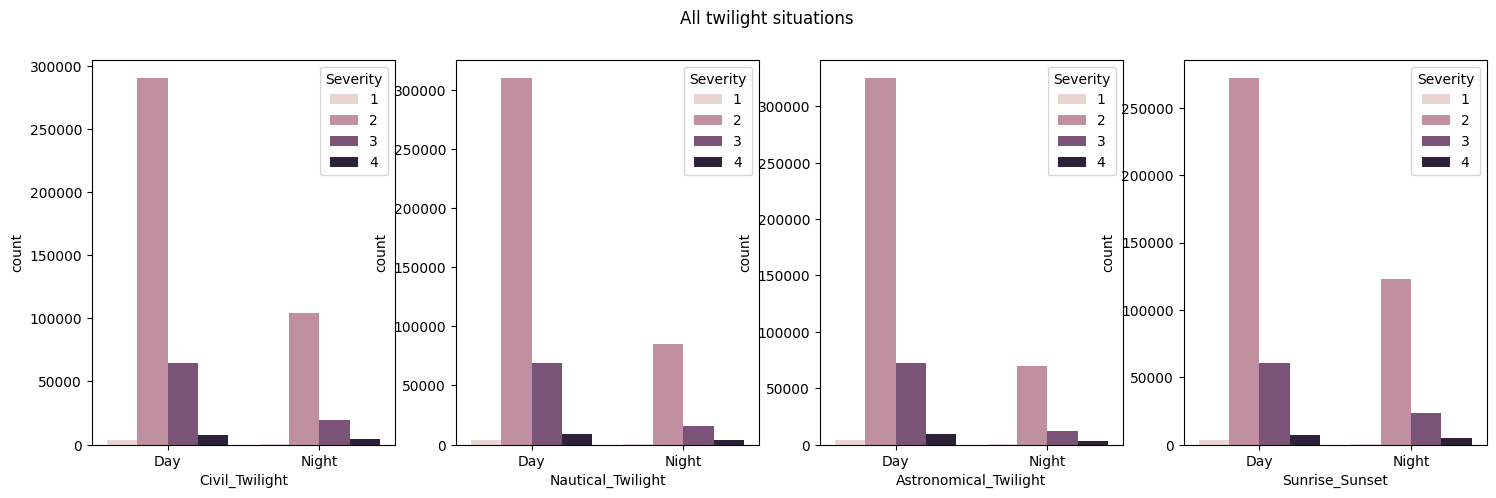

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))  # Again, creating subplots

fig.suptitle('All twilight situations')

# Making countplots
sns.countplot(ax=axes[0], data=df, x='Civil_Twilight', hue='Severity')
sns.countplot(ax=axes[1], data=df, x='Nautical_Twilight', hue='Severity')
sns.countplot(ax=axes[2], data=df, x='Astronomical_Twilight', hue='Severity')
sns.countplot(ax=axes[3], data=df, x='Sunrise_Sunset', hue='Severity')

Twilight categories did not provide a significant difference; the accident ratios remain nearly the same between day and night.
However, now we know that the majority of accidents were made during the day.

### Weather conditions

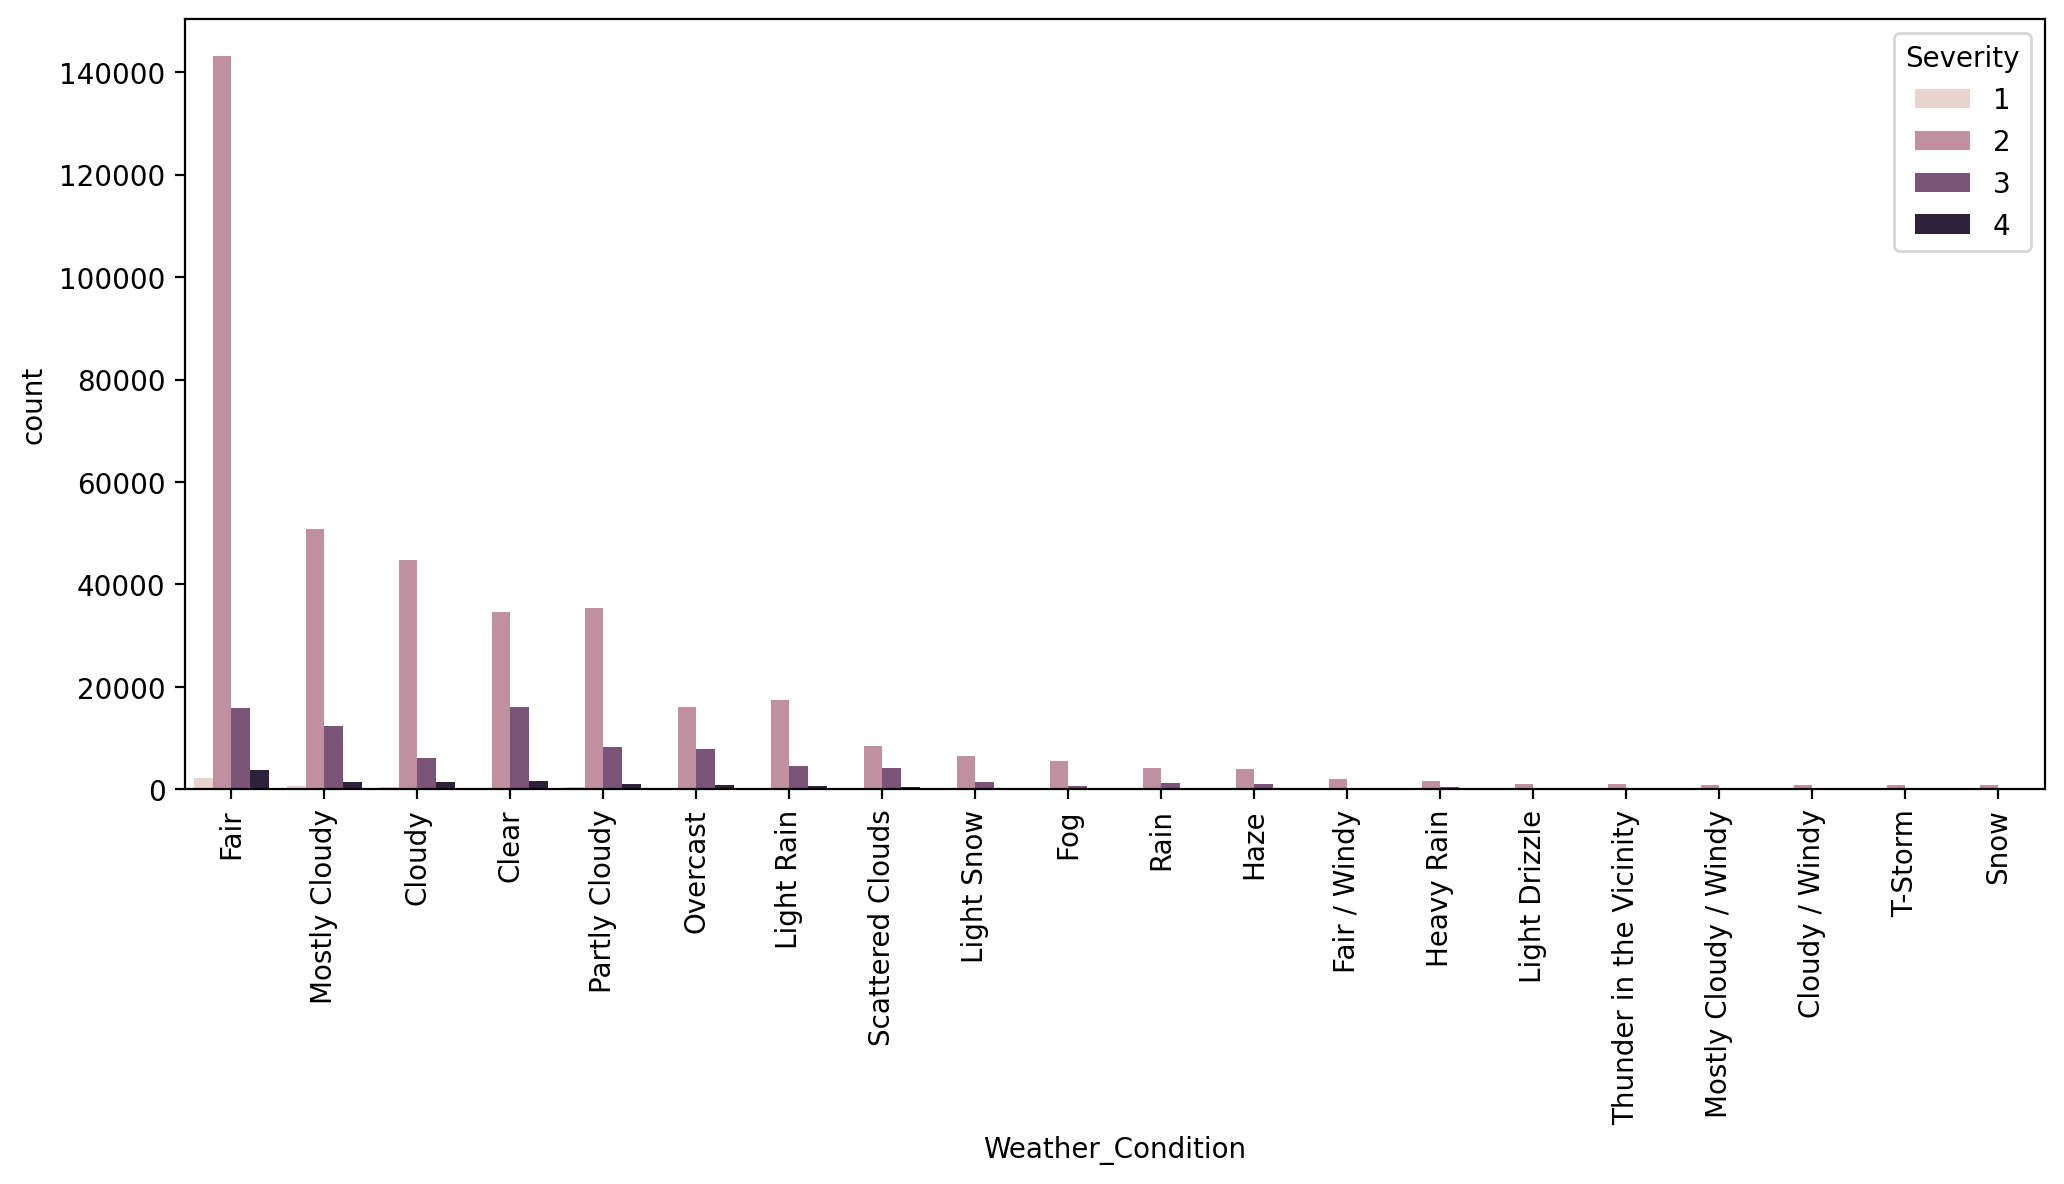

In [19]:
weather_order = df['Weather_Condition'].value_counts().index  # Creating order for countplot

# Making and editing countplot
plt.figure(dpi=200, figsize=(12, 5))  # Making plot bigger and making better quality
sns.countplot(data=df, x='Weather_Condition', order=weather_order[:20], hue='Severity')  
plt.xticks(rotation=90);

The majority of accidents occurred during fair or clear weather conditions. Weather was not a problem for accidents.

### Temperature

<Axes: xlabel='Severity', ylabel='Wind_Chill(F)'>

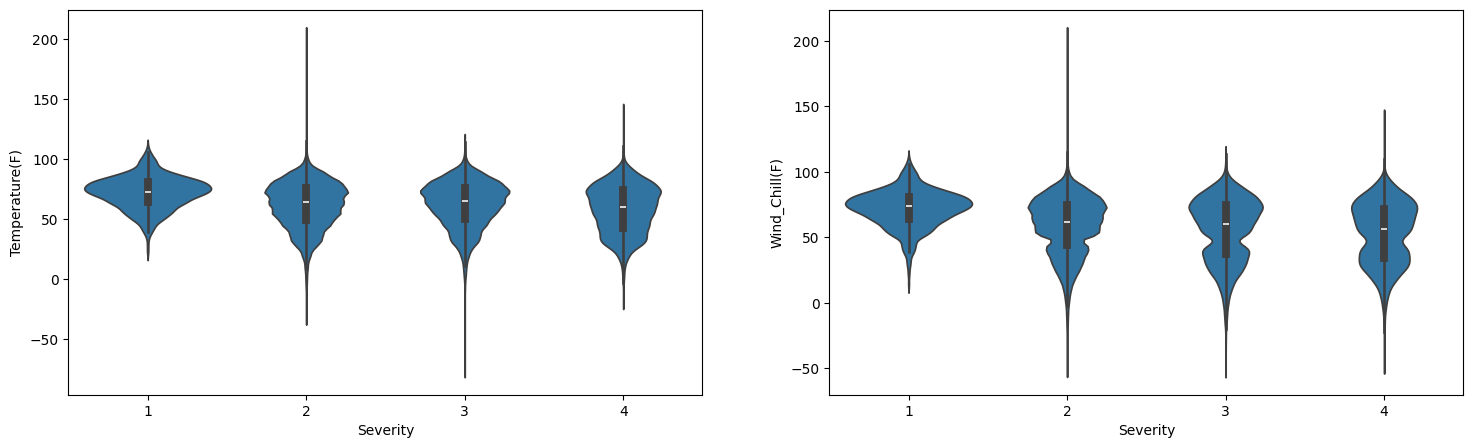

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))  # Again, creating subplots

sns.violinplot(ax=axes[0], data=df, x='Severity', y='Temperature(F)')
sns.violinplot(ax=axes[1], data=df, x='Severity', y='Wind_Chill(F)')

# Both wind chill and temperature should be almost the same.

Another set of outliers, <-50F and >120F. Unexpected values appeared.

In [21]:
len(df[(df['Temperature(F)'] >= 120) | (df['Temperature(F)'] <= -20)])

49

In [22]:
df = df.drop(df[(df['Temperature(F)'] >= 120) | (df['Temperature(F)'] <= -20)].index)  # Deleting outliers

I did not touch the `Wind_Chill`. If values for this feature are not going to change or some of outliers would stay, we will delete those rows entirely.

### Checking Tempereature again

<Axes: xlabel='Severity', ylabel='Wind_Chill(F)'>

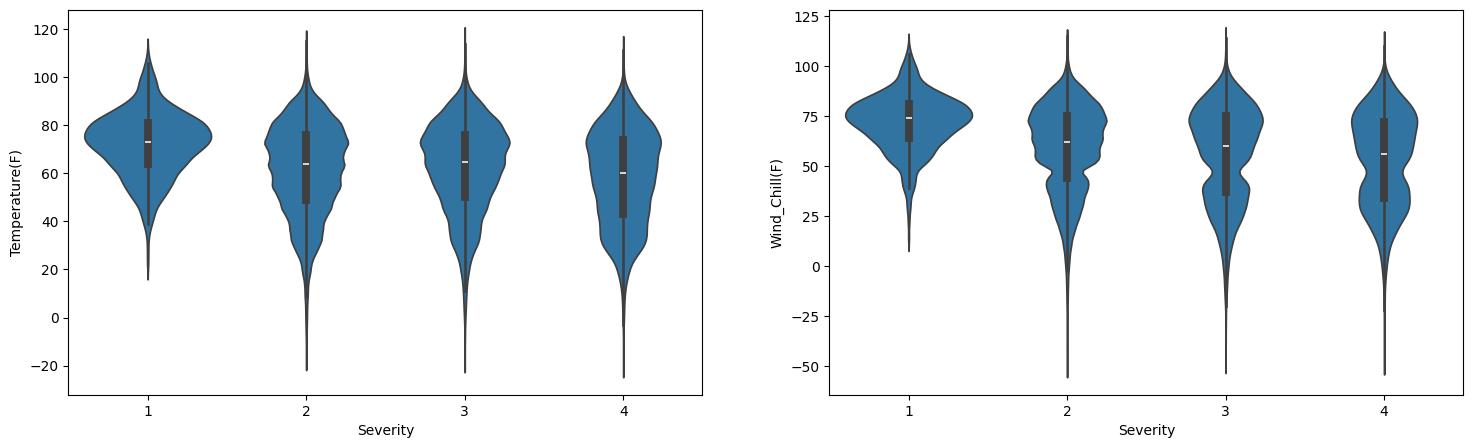

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.violinplot(ax=axes[0], data=df, x='Severity', y='Temperature(F)')
sns.violinplot(ax=axes[1], data=df, x='Severity', y='Wind_Chill(F)') 

We can speculate the remaining of -50F in `Wind_Chill`. Some rows might have completely different numbers for `Temperature` and `Wind_Chill`

In [24]:
len(df[(df['Wind_Chill(F)'] >= 120) | (df['Wind_Chill(F)'] <= -20)])

732

That number is higher, than I expected, however we still can easily delete these.

In [25]:
df = df.drop(df[(df['Wind_Chill(F)'] >= 120) | (df['Wind_Chill(F)'] <= -20)].index)  # Deleting outliers

### Humidity, Pressure, Visibility.

<Axes: xlabel='Severity', ylabel='Visibility(mi)'>

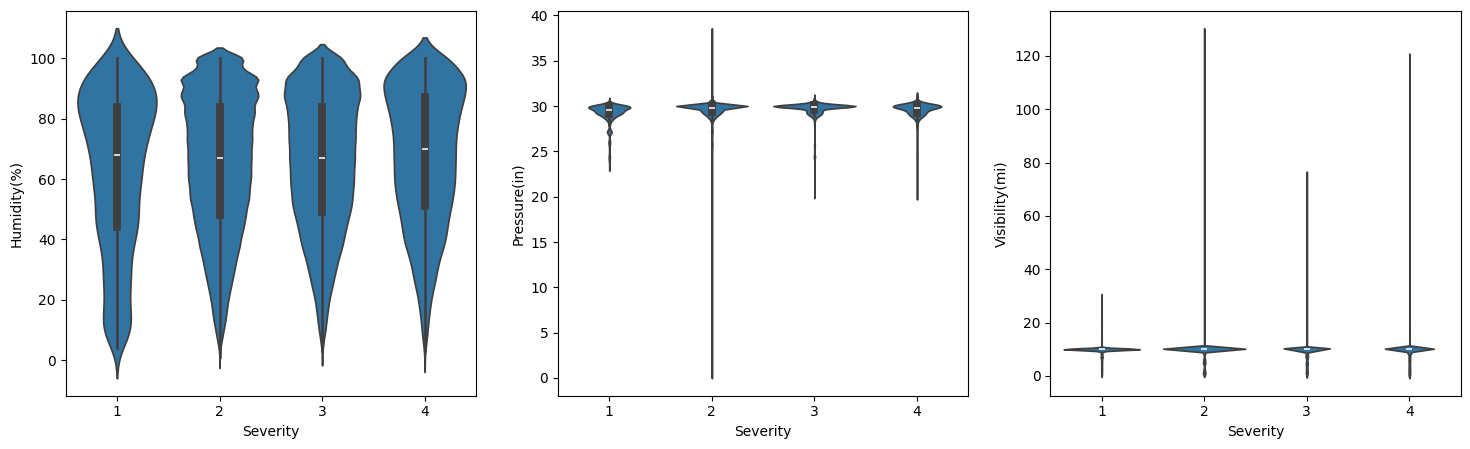

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.violinplot(ax=axes[0], data=df, x='Severity', y='Humidity(%)')
sns.violinplot(ax=axes[1], data=df, x='Severity', y='Pressure(in)')
sns.violinplot(ax=axes[2], data=df, x='Severity', y='Visibility(mi)')

`Humidity` is normal, however `Pressure` and `Visibility` are showing impossible values. More precisely: 0-25 for `Pressure` and >20 for `Visibility`. Deleting rows is not essential for this criteria, we could just turn these into NaN.

In [27]:
df.loc[(df['Pressure(in)'] < 27) | (df['Pressure(in)'] > 32), 'Pressure(in)'] = np.nan

In [28]:
df.loc[df['Visibility(mi)'] > 20, 'Visibility(mi)'] = np.nan

<Axes: xlabel='Severity', ylabel='Visibility(mi)'>

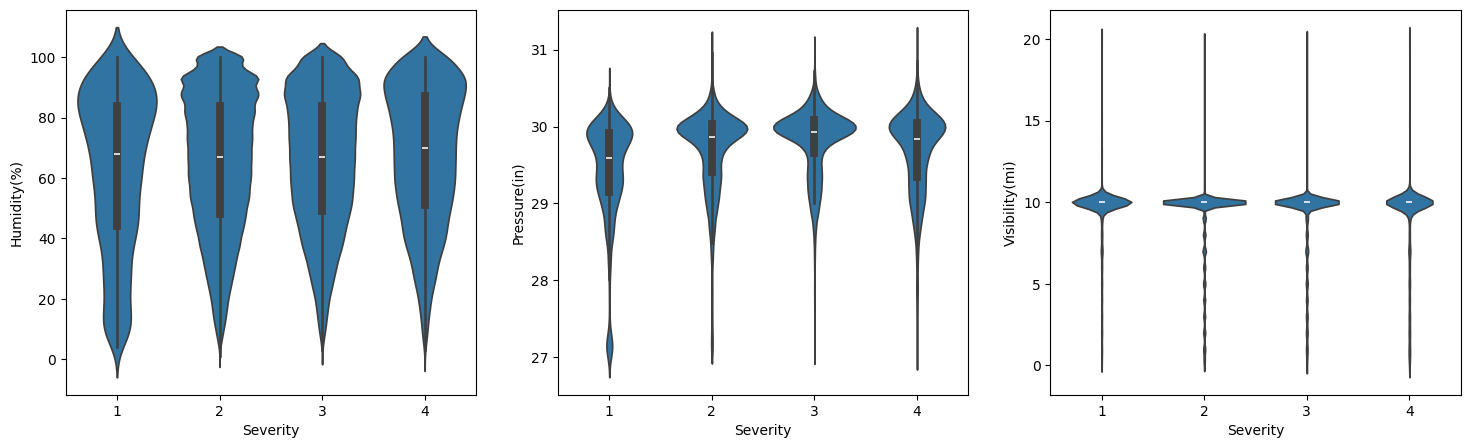

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.violinplot(ax=axes[0], data=df, x='Severity', y='Humidity(%)')
sns.violinplot(ax=axes[1], data=df, x='Severity', y='Pressure(in)')
sns.violinplot(ax=axes[2], data=df, x='Severity', y='Visibility(mi)')

It is better to check, whether the Visibility == 0 is during **Fog** or **Snow**

In [30]:
df[(df['Visibility(mi)'] < 1) & (df['Weather_Condition'] == 'Fog')]

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration,Log_Duration
33,A-6549508,Source1,2,2021-01-05 01:56:00,2021-01-05 04:46:28,38.087915,-122.231751,38.089805,-122.230831,0.140,...,False,False,False,False,Night,Night,Night,Night,170.466667,5.144389
121,A-6429874,Source1,2,2021-02-02 23:54:35,2021-02-03 01:51:37,42.469340,-91.086799,42.471268,-91.134196,2.419,...,False,False,False,False,Night,Night,Night,Night,117.033333,4.770967
185,A-6009145,Source1,2,2021-11-03 07:46:00,2021-11-03 08:07:00,44.933084,-123.074502,44.938864,-123.060322,0.800,...,True,False,False,False,Night,Day,Day,Day,21.000000,3.091042
210,A-835017,Source2,3,2021-11-03 07:37:24,2021-11-03 08:07:03,39.160172,-94.640839,NaN,NaN,0.000,...,False,False,False,False,Night,Day,Day,Day,29.650000,3.422633
267,A-1655685,Source2,2,2020-02-18 06:52:43,2020-02-18 07:52:30,45.409069,-123.052483,NaN,NaN,0.000,...,False,False,False,False,Night,Day,Day,Day,59.783333,4.107316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499007,A-4293477,Source1,2,2022-12-24 05:17:00,2022-12-24 06:38:15,37.100278,-120.930019,37.100692,-120.930785,0.051,...,False,False,False,False,Night,Night,Night,Night,81.250000,4.409763
499129,A-6501993,Source1,2,2021-02-20 05:21:00,2021-02-20 08:17:37,32.385094,-90.146320,32.381621,-90.146983,0.243,...,False,False,False,False,Night,Night,Night,Day,176.616667,5.179628
499525,A-3429912,Source1,2,2017-01-20 11:25:50,2017-01-20 14:00:00,41.696610,-92.546580,41.695961,-92.579845,1.717,...,False,False,False,False,Day,Day,Day,Day,154.166667,5.044500
499552,A-1615664,Source2,2,2020-01-28 08:04:02,2020-01-28 09:20:35,25.985689,-80.210762,NaN,NaN,0.000,...,False,False,False,False,Day,Day,Day,Day,76.550000,4.350923


That is enough for Visibility. Values > 1 or 2 are normal enough for driving.

### Checking POI (Points of Interest)

In [31]:
# Creating single feature with all POI
df['target'] = df[['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
                   'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
                   'Turning_Loop']].idxmax(axis=1)

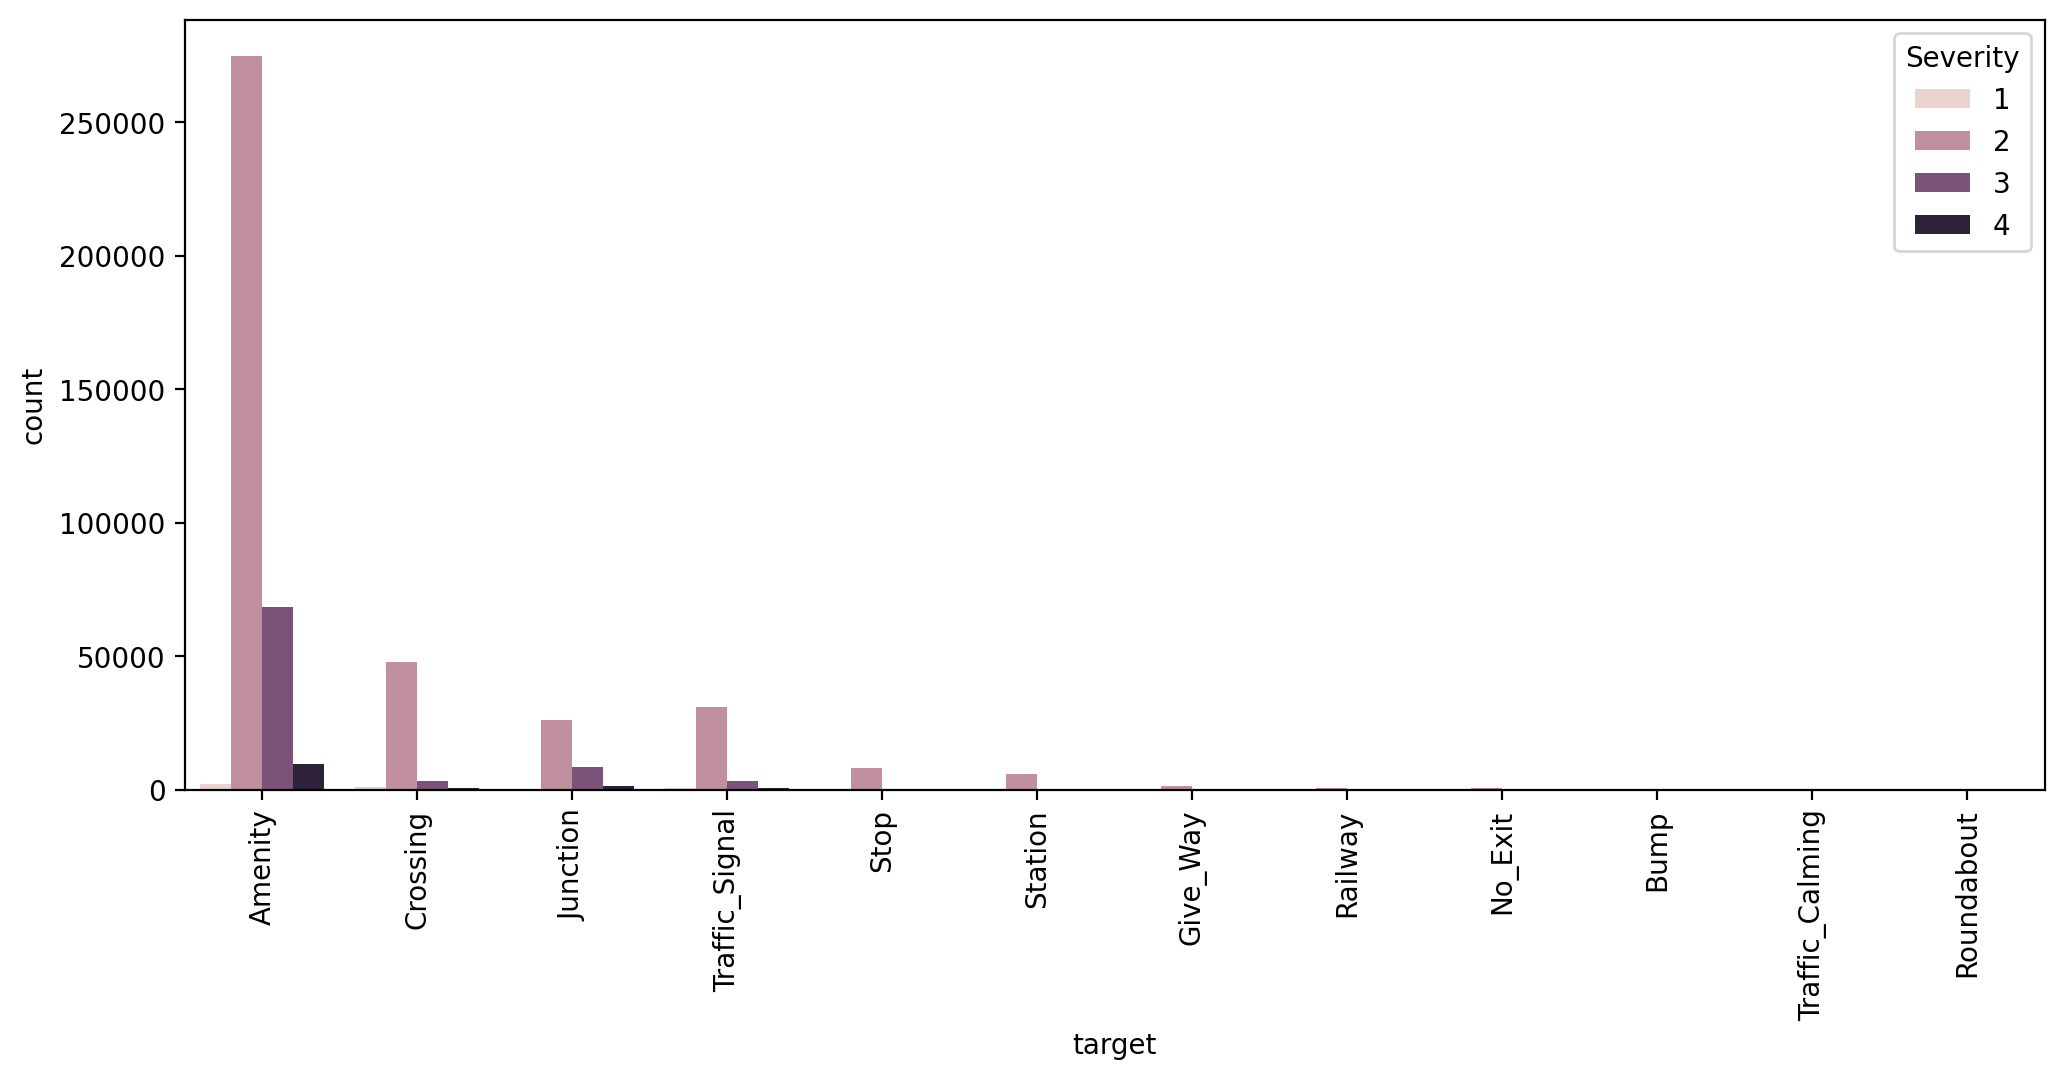

In [32]:
POI_order = df['target'].value_counts().index

plt.figure(dpi=200, figsize=(12, 5))
sns.countplot(data=df, x='target', order=POI_order, hue='Severity')
plt.xticks(rotation=90);

## Findings and Conclusions

By the end of this research I came up with some conclusions:
- `Duration` and `Distance` features  show inconsistent behavior. Even after removing outliers in the `Duration` column, outliers in `Distance` remained unchanged. This is illogical, as these two variables are expected to be strongly correlated.
- `Temperature` values vary significantly, and it is unclear how such values were generated if the data was sourced from weather forecasts. Similar to `Duration` and `Distance`, there is a clear mismatch between variables that should logically be related.
- Abnormal values in `Pressure and Visibility` were less critical, changing them was enough.
- A lot of different features (such as POI, Weather_Condition, and State) were stable and didn't require cleaning.

## Next Steps

The next step of this project is to improve the categorization of accidents by applying a combination of **Natural Language Processing (NLP)** and **Unsupervised Learning** techniques. The goal is to derive more meaningful severity classes based on the `Description` feature, rather than relying solely on the original Severity label.